# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
#data_path = ['..', 'data']
data_path = ['./data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import numpy as np
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [5]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [6]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [7]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

6107    1
3966    2
3416    4
4410    1
2836    4
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [9]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

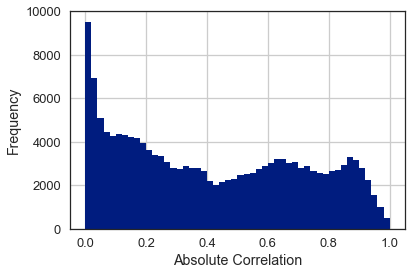

In [11]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [14]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [16]:
%%time
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

CPU times: user 6.28 s, sys: 65.5 ms, total: 6.35 s
Wall time: 6.45 s


In [17]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

# 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty, whereas
#        'liblinear' and 'saga' handle L1 penalty.
 
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
#        handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

In [18]:
%%time
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1_lin = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

CPU times: user 10min 28s, sys: 6.88 s, total: 10min 35s
Wall time: 10min 45s


In [19]:
%%time
# L1 regularized logistic regression
lr_l1_saga = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(X_train, y_train)

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 16min 38s, sys: 4.55 s, total: 16min 43s
Wall time: 16min 54s


In [20]:
%%time
# L2 regularized logistic regression
lr_l2_newton = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='newton-cg').fit(X_train, y_train)

CPU times: user 10min 22s, sys: 23.1 s, total: 10min 45s
Wall time: 6min 15s


In [21]:
%%time
# L2 regularized logistic regression
lr_l2_lbfgs = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(X_train, y_train)

CPU times: user 2min 24s, sys: 2.25 s, total: 2min 26s
Wall time: 1min 24s


In [22]:
%%time
# L2 regularized logistic regression
lr_l2_sag = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag').fit(X_train, y_train)

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 9min 40s, sys: 788 ms, total: 9min 41s
Wall time: 9min 42s


## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [23]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1_liblinear', 'l1_saga', 'l2_newton-cg', 'l2_lbfgs', 'l2_sag']
coeff_models = [lr, lr_l1_lin, lr_l1_saga, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                   l1_liblinear  \
            0         1         2         3         4         5            0   
160 -0.006053  0.282642 -0.144897 -0.067412  0.062806  0.239639     0.000000   
94   0.030394  0.062221  0.302152 -0.762586  0.318511  0.115725     0.000000   
289  0.037088  0.554674 -0.690193  0.346895  0.479209 -0.087341     0.000000   
484  0.002472  0.231954  0.265862  0.135484  0.213742  0.320182    -0.000935   
29  -0.072718  0.144341 -0.006495 -0.140440  0.239441 -0.164803     0.000000   
333  0.001310  0.230152  0.254187 -0.003961  0.054309  0.265299    -0.100364   
495  0.008565  0.217952  0.309497  0.123140  0.198157  0.059359    -0.285183   
367 -0.082711 -0.046523  0.176197  1.004514  0.226337  0.515784     0.000000   
26  -0.006823  0.428026 -0.340956 -0.004271 -0.324065  0.435066     0.000000   
212  0.067467  0.163853 -0.348613 -0.395370  0.056091  0.483722     0.000000   

                                     ...     l2_lbfgs                      \
            1         2         3    ...            2         3         4   
160  0.852361  0.000000 -0.436154    ...    -0.376571 -0.169333  0.567556   
94   0.000000  0.000000 -1.806093    ...     0.536206 -1.672367  1.270038   
289  0.000000 -0.301879  0.396990    ...    -0.795085  0.518524  1.828934   
484  0.986869  0.313077  0.104454    ...     0.242922 -0.000028  0.241509   
29   0.000000  0.000000 -0.028613    ...    -0.148081 -0.175882  0.606269   
333  0.240379  0.409862  0.008273    ...     0.199658 -0.393493 -0.009365   
495  0.121736  0.866466  0.216011    ...     0.194457 -0.348654  0.360260   
367  0.000000  0.000000  1.886365    ...     0.251640  2.032921  0.967909   
26   0.000000  0.000000 -0.099222    ...    -0.336939 -0.123339 -0.763436   
212  0.000000 -0.378476 -2.908657    ...    -0.375478 -0.736152  0.025177   

                 l2_sag                                                    
            5         0         1         2         3         4         5  
160  3.994039 -0.015467  0.799854 -0.536488 -0.125074  0.136432  0.588482  
94   1.270513  0.050476 -0.033076  0.751687 -1.422185  0.541879  0.278358  
289  0.684337  0.121899  1.089515 -1.230491  0.555174  0.845677 -0.098927  
484  1.121351 -0.032304  0.351991  0.446231  0.187838  0.340375  0.441367  
29  -0.306959 -0.134765  0.818001 -0.411569 -0.229777  0.436911 -0.187391  
333  1.626979 -0.032680  0.381252  0.396664 -0.041739  0.116739  0.420544  
495 -0.394607 -0.020939  0.326595  0.451999  0.107792  0.314183 -0.068729  
367  1.608187 -0.077058  0.287641  0.351790  1.720494  0.422720  0.852249  
26   2.444282 -0.014586  0.541288 -0.476598 -0.059341 -0.520363  0.799210  
212  2.811327  0.132307  0.195119 -0.376326 -0.616172  0.047975  0.916359  

[10 rows x 36 columns]

Prepare six separate plots for each of the multi-class coefficients.

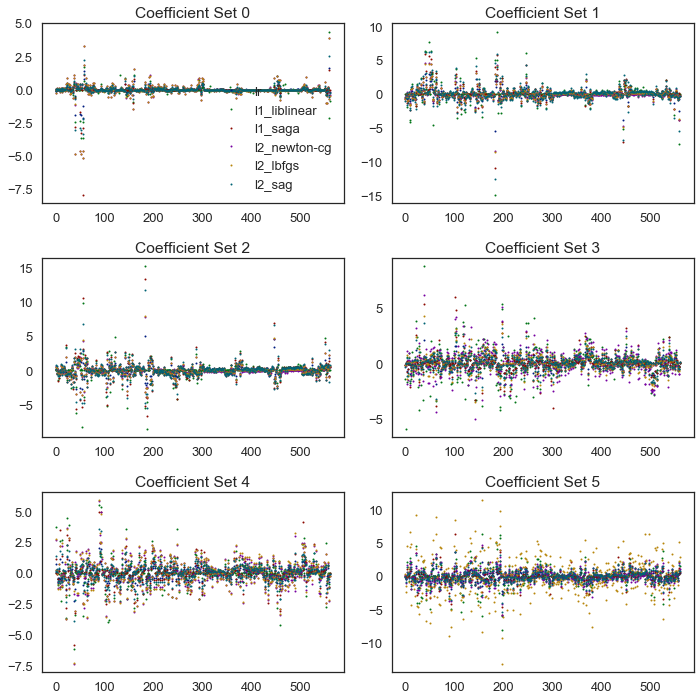

In [24]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [25]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1_liblinear', 'l1_saga', 'l2_newton-cg', 'l2_lbfgs', 'l2_sag']
coeff_models = [lr, lr_l1_lin, lr_l1_saga, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
0,3,3,3,3,3,3
1,5,5,5,5,5,5
2,3,3,3,3,3,3
3,1,1,1,1,1,1
4,0,0,0,0,0,0


In [26]:
y_prob.head()

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
0,0.998939,0.998941,0.999945,0.999921,0.999808,0.999962
1,0.988165,0.999566,0.999490,0.999971,0.999966,0.999313
2,0.987592,0.995667,0.998336,0.999553,0.998685,0.999113
3,0.981381,0.999210,0.999532,0.994636,0.994374,0.999267
4,0.998277,0.999918,0.999878,0.999656,0.999627,0.999970


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [27]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [28]:
#Run the metrics
metrics

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
accuracy,0.984142,0.983819,0.982848,0.984466,0.983495,0.982524
auc,0.990384,0.990144,0.989566,0.990548,0.989972,0.989382
fscore,0.984143,0.983815,0.982847,0.984466,0.983494,0.982524
precision,0.984144,0.983835,0.982853,0.984471,0.983498,0.982526
recall,0.984142,0.983819,0.982848,0.984466,0.983495,0.982524


## Question 8

Display or plot the confusion matrix for each model.

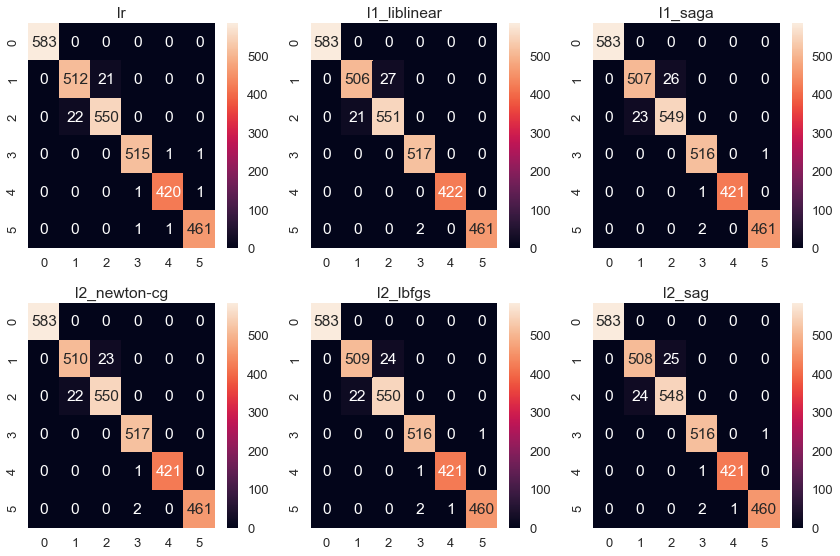

In [29]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 8)

#axList[-1].axis('off')

for ax,lab in zip(axList[:], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

## Question 9
 Identify highly correlated columns and drop those columns before building models

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .8

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))

data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

 Repeat Model building with new training data after removing higly correlated columns

In [31]:
# Try standard, L1 and L2 Logistic regression
from sklearn.linear_model import LogisticRegression

In [32]:
%%time
# Standard logistic regression
lr = LogisticRegression().fit(X_new, Y_new)

from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1_lin = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_new, Y_new)

lr_l1_saga = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(X_new, Y_new)

# L2 regularized logistic regression
lr_l2_newton = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='newton-cg').fit(X_new, Y_new)

lr_l2_lbfgs = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(X_new, Y_new)

lr_l2_sag = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag').fit(X_new, Y_new)

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 29min 13s, sys: 7.38 s, total: 29min 21s
Wall time: 28min 53s


## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [33]:
# Combine all the coefficients into a dataframe for comparison
coefficients = list()

coeff_labels = ['lr', 'l1_liblinear', 'l1_saga', 'l2_newton-cg', 'l2_lbfgs', 'l2_sag']
coeff_models = [lr, lr_l1_lin, lr_l1_saga, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                   l1_liblinear  \
           0         1         2         3         4         5            0   
29  0.003610 -0.158568  0.157749  0.094590 -0.022353 -0.074895          0.0   
20 -0.116685 -0.171851 -0.024401  0.235020  0.081121  0.206025          0.0   
59 -0.173083 -0.197347  0.396655  0.141191  0.014055 -0.140898          0.0   
68 -0.288346  0.161399  0.917128 -0.728766  0.061449 -0.258693          0.0   
88  0.040890 -0.040849  0.013809  0.064288 -0.003209 -0.088635          0.0   
85 -0.479933  0.192132  0.664904 -0.509428  0.014289 -0.104183          0.0   
87  0.011349 -0.067260 -0.102469  0.154316  0.105333 -0.071034          0.0   
69  0.151564  0.467578 -0.160224  0.429674  0.092205 -0.881877          0.0   
78 -0.255094  0.065110 -0.081136  0.043722  0.439269 -0.407900          0.0   
62 -0.144275  0.411462 -0.190394 -0.021777 -0.452361  0.228472          0.0   

                     ...     l2_lbfgs                                  l2_sag  \
      1    2    3    ...            2         3         4         5         0   
29  0.0  0.0  0.0    ...     0.001931  0.000761 -0.001325 -0.063202  0.000010   
20  0.0  0.0  0.0    ...    -0.000082  0.000024 -0.000881  1.484718 -0.000205   
59  0.0  0.0  0.0    ...     0.000862 -0.000244 -0.002006 -0.234360 -0.000164   
68  0.0  0.0  0.0    ...     0.000372 -0.000181 -0.001078 -0.183997 -0.000346   
88  0.0  0.0  0.0    ...    -0.000543  0.002467 -0.000800 -0.087985 -0.000632   
85  0.0  0.0  0.0    ...     0.000847 -0.000636 -0.001723 -0.137179 -0.000743   
87  0.0  0.0  0.0    ...    -0.002682  0.003087  0.002298 -0.083335 -0.000217   
69  0.0  0.0  0.0    ...     0.000041  0.000329 -0.000916 -1.193278 -0.000388   
78  0.0  0.0  0.0    ...     0.000426  0.000374 -0.001162 -0.737489 -0.000191   
62  0.0  0.0  0.0    ...    -0.000124 -0.000022  0.000550  0.332591  0.000651   

                                                      
           1         2         3         4         5  
29 -0.000930  0.001919  0.000760 -0.001325 -0.063316  
20  0.000665 -0.000080  0.000023 -0.000881  1.573913  
59  0.000632  0.000858 -0.000245 -0.002006 -0.264185  
68  0.000448  0.000369 -0.000181 -0.001078 -0.221584  
88  0.000083 -0.000547  0.002467 -0.000800 -0.084532  
85  0.001287  0.000842 -0.000636 -0.001723 -0.110356  
87 -0.001750 -0.002669  0.003086  0.002298 -0.080325  
69  0.000897  0.000041  0.000329 -0.000916 -1.150085  
78  0.000087  0.000423  0.000374 -0.001162 -0.804267  
62 -0.002035 -0.000124 -0.000023  0.000549  0.404402  

[10 rows x 36 columns]

Prepare six separate plots for each of the multi-class coefficients.

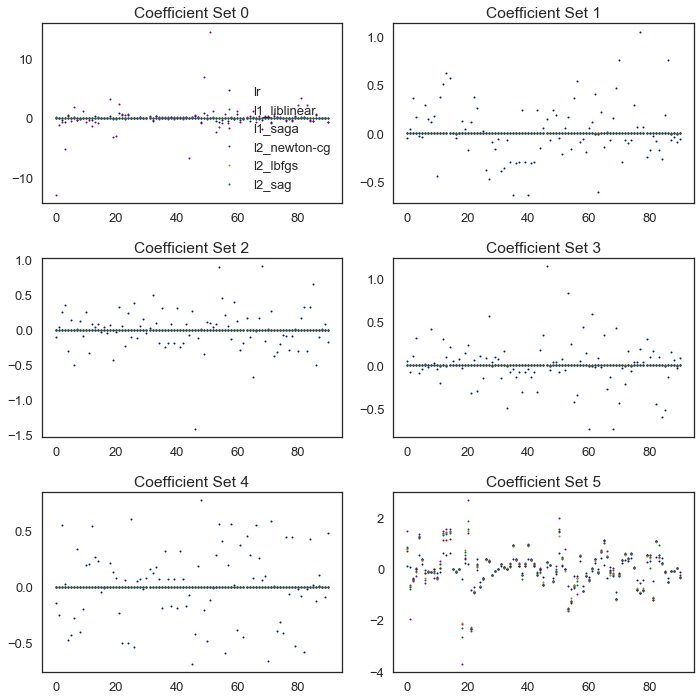

In [34]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [35]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1_liblinear', 'l1_saga', 'l2_newton-cg', 'l2_lbfgs', 'l2_sag']
coeff_models = [lr, lr_l1_lin, lr_l1_saga, lr_l2_newton, lr_l2_lbfgs, lr_l2_sag]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test_new), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test_new).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
0,2,0,2,2,0,0
1,0,0,2,0,0,0
2,0,0,2,0,0,0
3,3,0,2,2,0,0
4,1,0,2,2,0,0


In [36]:
y_prob.head()

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
0,0.186098,0.191477,0.198724,0.194524,0.195056,0.195367
1,0.219223,0.189973,0.194118,0.220839,0.191883,0.191715
2,0.197043,0.189556,0.193359,0.197414,0.190990,0.191026
3,0.186968,0.186988,0.186115,0.185540,0.184151,0.184078
4,0.244998,0.190974,0.197050,0.194542,0.194237,0.194308


## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [37]:
# Calculate the error metrics as listed above
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(Y_test_new, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(Y_test_new, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(Y_test_new, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(Y_test_new, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
#Run the metrics
metrics

,lr,l1_liblinear,l1_saga,l2_newton-cg,l2_lbfgs,l2_sag
accuracy,0.182913,0.192621,0.181748,0.184078,0.186019,0.187184
auc,0.502967,0.500023,0.501562,0.500043,0.501272,0.502007
fscore,0.166620,0.062927,0.077406,0.120168,0.121037,0.122672
precision,0.182976,0.087816,0.059266,0.095826,0.095300,0.096947
recall,0.182913,0.192621,0.181748,0.184078,0.186019,0.187184


## Question 13

Display or plot the confusion matrix for each model.

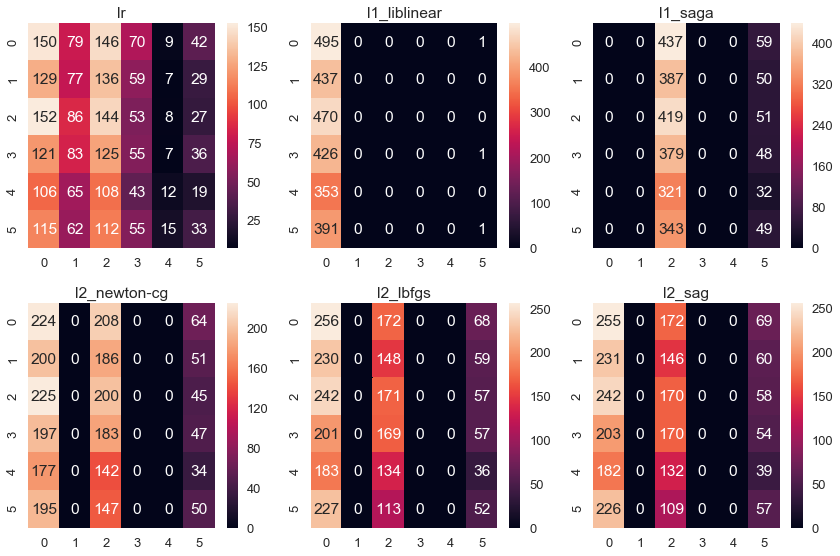

In [39]:
#plot the confusion matrix
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 8)

#axList[-1].axis('off')

for ax,lab in zip(axList[:], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()